In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
# Sean's pathname
pathname = '/Users/seantsung/Library/CloudStorage/Box-Box/Stanford CPET Projects/'

## Create Cleaned CPET DF

In [5]:
cpet_df = pd.read_json(pathname + 'BBB DATA/CPX datasets-selected/BxBData.json').transpose()

In [6]:
cpet_df.columns

Index(['firstName', 'lastName', 'ID1', 'Gender', 'DOB', 'Height', 'Weight',
       'testDate', 'testTime', 'TestDuration', 'ExerciseDuration', 'Ergometer',
       'Protocol', 'BarometricPress', 'AmbientTemp', 'AmbientRH', 'Time', 'Rf',
       'VT', 'VE', 'VO2', 'VCO2', 'RQ', 'O2exp', 'CO2exp', 'VE/VO2', 'VE/VCO2',
       'VO2/Kg', 'METS', 'HR', 'VO2/HR', 'FeO2', 'FeCO2', 'FetO2', 'FetCO2',
       'FiO2', 'FiCO2', 'SpO2', 'Power', 'Real_Power', 'Revolution', 'Speed',
       'Grade', 'P_Syst', 'P_Diast', 'Phase', 'Ambient_Temp', 'RH_Amb',
       'Analyzer_Pressure', 'PB', 'Ti', 'Te', 'Dyspnea', 'Leg Pain'],
      dtype='object')

In [8]:
single_entry_columns = ['firstName', 'lastName', 'ID1', 'Gender', 'DOB', 'Height', 'Weight',
       'testDate', 'testTime', 'TestDuration', 'ExerciseDuration', 'Ergometer',
       'Protocol', 'BarometricPress', 'AmbientTemp', 'AmbientRH']

In [4]:
multi_entry_columns = ['Time', 'Rf',
       'VT', 'VE', 'VO2', 'VCO2', 'RQ', 'O2exp', 'CO2exp', 'VE/VO2', 'VE/VCO2',
       'VO2/Kg', 'METS', 'HR', 'VO2/HR', 'FeO2', 'FeCO2', 'FetO2', 'FetCO2',
       'FiO2', 'FiCO2', 'SpO2', 'Power', 'Real_Power', 'Revolution', 'Speed',
       'Grade', 'P_Syst', 'P_Diast', 'Phase', 'Ambient_Temp', 'RH_Amb',
       'Analyzer_Pressure', 'PB', 'Ti', 'Te', 'Dyspnea', 'Leg Pain']

In [10]:
len(multi_entry_columns)

38

In [20]:
# All multi-entry columns 
float_columns = ['Height', 'Weight', 'BarometricPress', 'AmbientTemp', 'AmbientRH', 'Time', 'Rf',
       'VT', 'VE', 'VO2', 'VCO2', 'RQ', 'O2exp', 'CO2exp', 'VE/VO2', 'VE/VCO2',
       'VO2/Kg', 'METS', 'HR', 'VO2/HR', 'FeO2', 'FeCO2', 'FetO2', 'FetCO2',
       'FiO2', 'FiCO2', 'SpO2', 'Power', 'Real_Power', 'Revolution', 'Speed',
       'Grade', 'P_Syst', 'P_Diast', 'Ambient_Temp', 'RH_Amb',
       'Analyzer_Pressure', 'PB', 'Ti', 'Te']

In [24]:
time_columns = ['DOB', 'testDate', 'testTime']

In [26]:
duration_columns = ['TestDuration', 'ExerciseDuration']

In [28]:
str_columns = ['firstName', 'lastName', 'ID1', 'Gender', 'Ergometer', 'Protocol', 'Phase', 'Dyspnea', 'Leg Pain']

In [30]:
def process_time(df):
    df['testDateTime'] = pd.to_datetime(df['testDate'] + ' ' + df['testTime']).dt.tz_localize('US/Pacific')
    df.drop(columns = ['testDate', 'testTime'], inplace=True)
    df['DOB'] = pd.to_datetime(df['DOB']).dt.tz_localize('US/Pacific')

In [32]:
def process_cpet(df):
    for col in df:
        if col in single_entry_columns:
            df[col] = df[col].apply(process_single_entry_list)
            if col in float_columns:
                df[col] = df[col].astype(float)
            elif col in duration_columns:
                df[col] = df[col].str.split(":").apply(lambda x: float(x[0]) * 60 + float(x[1]))
        if col in multi_entry_columns:
            df[col] = df[col].apply(process_multi_entry_list, args=(col,))
    process_time(df)

In [17]:
def process_single_entry_list(x):
    if pd.isna(x):
        return x
    return x[0]

In [34]:
def process_multi_entry_list(x, col):
    if col in float_columns:
        float_x = [float(i) if (i != '') else np.NaN for i in x]
        if sum(pd.Series(float_x).isna()) == len(float_x):
            return list()
        else:
            return float_x
    if col in str_columns:
        # All empty string
        x = list(x)
        if x.count("") == len(x):
            return list()
        else:
            return x

In [1]:
# cpet_df

In [19]:
process_cpet(cpet_df)

/var/folders/m2/jn0ybx8d5pn4y_x2l0trfkk00000gp/T/ipykernel_21768/313362486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['testDateTime'] = pd.to_datetime(df['testDate'] + ' ' + df['testTime']).dt.tz_localize('US/Pacific')


In [20]:
cpet_df.dtypes

firstName                                object
lastName                                 object
ID1                                      object
Gender                                   object
DOB                  datetime64[ns, US/Pacific]
Height                                  float64
Weight                                  float64
TestDuration                            float64
ExerciseDuration                        float64
Ergometer                                object
Protocol                                 object
BarometricPress                         float64
AmbientTemp                             float64
AmbientRH                               float64
Time                                     object
Rf                                       object
VT                                       object
VE                                       object
VO2                                      object
VCO2                                     object
RQ                                      

In [18]:
#cpet_df

In [20]:
#cpet_df['Time']

In [17]:
min(cpet_df.testDateTime)

Timestamp('2012-09-06 09:11:00-0700', tz='US/Pacific')

In [18]:
max(cpet_df.testDateTime)

Timestamp('2020-06-01 15:59:00-0700', tz='US/Pacific')

In [22]:
len(np.unique(cpet_df.ID1))

2858

In [28]:
#cpet_df['Dyspnea'].value_counts()

In [26]:
cpet_df['Leg Pain'].value_counts()

Leg Pain
[]    4221
Name: count, dtype: int64

In [168]:
cpet_df['list_length'] = cpet_df['Time'].apply(len)

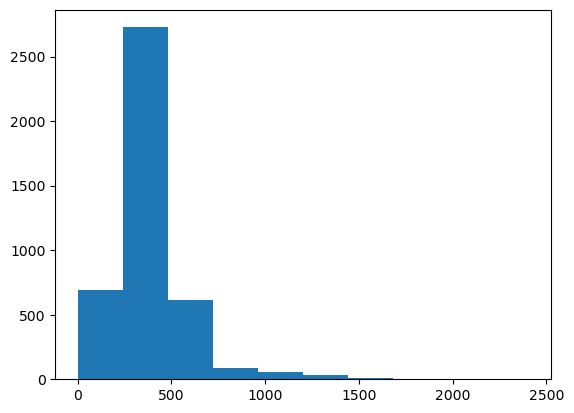

In [178]:
plt.hist(cpet_df['list_length']);

In [189]:
#Alternative measure of test duration.
cpet_df['LastTime'] = cpet_df['Time'].apply(lambda x: x[-1])

Text(0, 0.5, 'Test Duration')

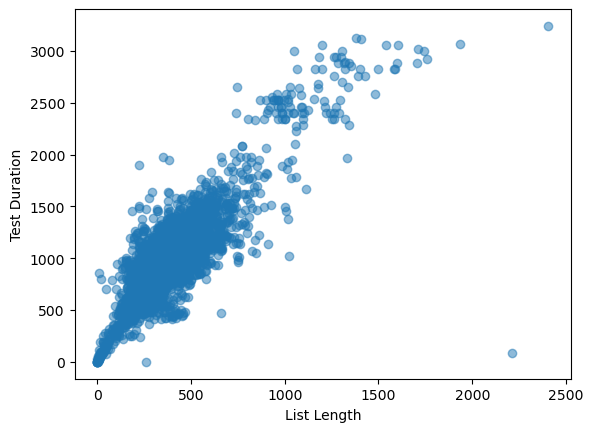

In [184]:
plt.scatter(cpet_df['list_length'], cpet_df['TestDuration'], alpha=0.5);
plt.xlabel("List Length")
plt.ylabel("Test Duration")

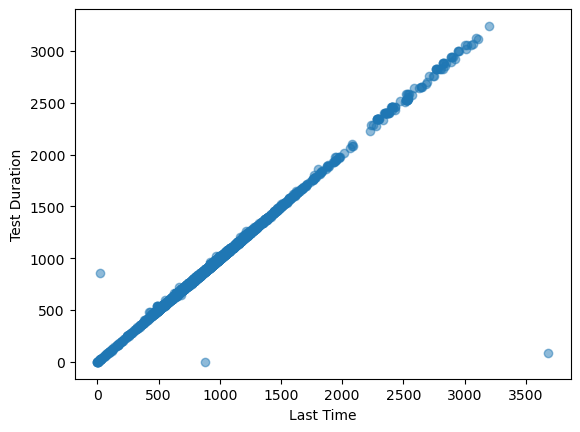

In [191]:
plt.scatter(cpet_df['LastTime'], cpet_df['TestDuration'], alpha=0.5);
plt.xlabel("Last Time")
plt.ylabel("Test Duration");

In [166]:
cpet_df.columns

Index(['firstName', 'lastName', 'ID1', 'Gender', 'DOB', 'Height', 'Weight',
       'TestDuration', 'ExerciseDuration', 'Ergometer', 'Protocol',
       'BarometricPress', 'AmbientTemp', 'AmbientRH', 'Time', 'Rf', 'VT', 'VE',
       'VO2', 'VCO2', 'RQ', 'O2exp', 'CO2exp', 'VE/VO2', 'VE/VCO2', 'VO2/Kg',
       'METS', 'HR', 'VO2/HR', 'FeO2', 'FeCO2', 'FetO2', 'FetCO2', 'FiO2',
       'FiCO2', 'SpO2', 'Power', 'Real_Power', 'Revolution', 'Speed', 'Grade',
       'P_Syst', 'P_Diast', 'Phase', 'Ambient_Temp', 'RH_Amb',
       'Analyzer_Pressure', 'PB', 'Ti', 'Te', 'Dyspnea', 'Leg Pain',
       'testDateTime'],
      dtype='object')

In [ ]:
cpet_df['firstName'] = cpet_df['firstName'].astype(str).str.replace("['", "").str.replace("']", "")

In [57]:
cpet_df['lastName'] = cpet_df['lastName'].astype(str).str.replace("['", "").str.replace("']", "")

In [64]:
cpet_df['ID1'] = cpet_df['ID1'].astype(str).str.replace("['", "").str.replace("']", "")

In [70]:
cpet_df['ID1'].value_counts().value_counts()

count
1     2058
2      494
3      193
4       62
5       33
6       11
7        3
9        2
70       1
8        1
Name: count, dtype: int64

In [32]:
cpet_df['firstName'] = cpet_df['firstName'].astype(str)

In [22]:
cpet_df.to_parquet(pathname + "BBB DATA/CPX datasets-selected/CleanedDatasets/sean_yuewei_cleaned_cpet_df")

## Process Combined CPET DF (Sean + Yuewei + Nevin)

In [36]:
def process_combined_cpet(df):
    for col in df:
        if col in multi_entry_columns:
            df[col] = df[col].apply(process_multi_entry_list, args=(col,))

In [49]:
combined_cleaned_df = pd.read_parquet(pathname + 'BBB DATA/CPX datasets-selected/CleanedDatasets/combined_cleaned_df.parquet')

In [50]:
process_combined_cpet(combined_cleaned_df)

In [54]:
combined_cleaned_df.to_parquet(pathname + 'BBB DATA/CPX datasets-selected/CleanedDatasets/combined_cleaned_df_111524.parquet')